<a href="https://colab.research.google.com/github/powernv/python_DA/blob/main/hometasks/%D0%94%D0%972_%22HH_api_hometask_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте DataFrame  добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

https://github.com/hhru/api

In [11]:
import requests
from tqdm.auto import tqdm
import pandas as pd

In [12]:
url = f'https://api.hh.ru/areas'
reg = requests.get(url)
regg = reg.json()

In [13]:
reggg = [(row['id'], row['name']) for row in regg]
reggg

[('113', 'Россия'),
 ('5', 'Украина'),
 ('40', 'Казахстан'),
 ('9', 'Азербайджан'),
 ('16', 'Беларусь'),
 ('28', 'Грузия'),
 ('1001', 'Другие регионы'),
 ('48', 'Кыргызстан'),
 ('97', 'Узбекистан')]

In [14]:
sber = '3529'
page = 1
num_per_page = 100
region = [113, 5, 40, 9, 16, 28, 1001, 48, 97]
date_from = '2022-07-01'
date_to = '2022-07-27'

In [15]:

url = f'https://api.hh.ru/vacancies'
params = {
    'employer_id':sber,
    'page':page,
    'per_page':num_per_page,
    'area':region,
    'date_from':date_from,
    'date_to':date_to
}
res = requests.get(url, params=params)
res.status_code

200

In [16]:

vacancies = res.json()
num_pages = vacancies.get('pages')
found = vacancies.get('found')
num_pages, found

(14, 1382)

In [17]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [18]:
all_vacancy_ids = []
for i in tqdm(range(num_pages)):
    url = f'https://api.hh.ru/vacancies'
    params = {
      'employer_id':sber,
      'page': i,
      'per_page':num_per_page,
      'area':region,
      'date_from':date_from,
      'date_to':date_to
    }
    res = requests.get(url, params = params)
    vacancies = res.json()
    vacancy_ids = [v.get('id') for v in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/14 [00:00<?, ?it/s]

In [19]:
len(all_vacancy_ids)

1382

In [20]:
url = f'https://api.hh.ru/vacancies'
params = {
    'employer_id':'3529',
    'page':1,
    'per_page':100,
    'area':[113, 5, 40, 9, 16, 28, 1001, 48, 97],
    'date_from':'2022-07-28',
    'date_to':'2022-08-04'
}
res2 = requests.get(url, params=params)
res2.status_code

200

In [21]:
vacancies2 = res2.json()
num_pages2 = vacancies2.get('pages')
found = vacancies2.get('found')
num_pages2, found

(14, 1336)

In [22]:
all_vacancy_ids2 = []
for i in tqdm(range(num_pages2)):
    url = f'https://api.hh.ru/vacancies'
    params2 = {
      'employer_id': sber,
      'page': i,
      'per_page': num_per_page,
      'area': region,
      'date_from': date_from,
      'date_to': date_to
    }
    res2 = requests.get(url, params = params2)
    vacancies2 = res2.json()
    vacancy_ids2 = [v.get('id') for v in vacancies2.get('items')]
    all_vacancy_ids2.extend(vacancy_ids2)

  0%|          | 0/14 [00:00<?, ?it/s]

In [23]:
len(all_vacancy_ids2)

1382

In [24]:
sber = '3529'
page = 1
num_per_page = 100
region = [113, 5, 40, 9, 16, 28, 1001, 48, 97]
date_from = '2022-08-05'
date_to = '2022-08-08'

url = f'https://api.hh.ru/vacancies'

params3 = {
    'employer_id': sber,
    'page': page,
    'num_per_page': num_per_page,
    'area': region,
    'date_from': date_from,
    'date_to': date_to
}

res3 = requests.get(url, params = params3)
res3.status_code

200

In [25]:
vacancies3 = res3.json()
num_pages3 = vacancies3.get('pages')
found3 = vacancies3.get('found')
num_pages3, found3

(27, 538)

In [26]:
a = [v.get('id') for v in vacancies3.get('items')]
len(a)

20

In [27]:
all_vacancy_ids3 = []
for i in tqdm(range(num_pages3)):
    url = f'https://api.hh.ru/vacancies'
    params3 = {
      'employer_id': sber,
      'page': i,
      'per_page': 20,
      'area': region,
      'date_from': date_from,
      'date_to': date_to
    }
    res3 = requests.get(url, params = params3)
    vacancies3 = res3.json()
    vacancy_ids3 = [v.get('id') for v in vacancies3.get('items')]
    all_vacancy_ids3.extend(vacancy_ids3)

  0%|          | 0/27 [00:00<?, ?it/s]

In [28]:
len(all_vacancy_ids3)

538

In [29]:
all_vacancy_ids.extend(all_vacancy_ids2)

In [30]:
len(all_vacancy_ids)

2764

In [31]:
all_vacancy_ids.extend(all_vacancy_ids3)

In [32]:
len(all_vacancy_ids)

3302

In [33]:
save = all_vacancy_ids.copy()

In [34]:
len(save)

3302

In [35]:
# v[0].get('')

Извлеките все описания этих вакансий

In [36]:
len(all_vacancy_ids)
# https://api.hh.ru/vacancies/66634517

3302

In [37]:
import time
vacs = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacs.append(res.json())
    time.sleep(1)

  0%|          | 0/3302 [00:00<?, ?it/s]

Создайте DataFrame, добавьте поле skills

In [38]:
df = pd.json_normalize(vacs)

In [40]:
vac_df = df.drop(['relations', 'created_at', 'working_days', 'languages', 'type.id', 'insider_interview', 'response_letter_required', 'allow_messages', 'contacts','branded_description', 'vacancy_constructor_template', 'accept_handicapped', 'accept_kids', 'archived', 'response_url', 'code', 'hidden','quick_responses_allowed', 'driver_license_types','accept_incomplete_resumes','negotiations_url', 'suitable_resumes_url','apply_alternate_url', 'has_test', 'test', 'alternate_url', 'working_time_intervals', 'working_time_modes','accept_temporary', 'billing_type.id', 'billing_type.name','area.id', 'area.url', 'salary.from', 'salary.to','salary.currency', 'salary.gross','address.city', 'address.street', 'address.building','address.description', 'address.lat', 'address.lng', 'address.raw','address.metro', 'address.metro_stations','employer.name', 'employer.url', 'employer.alternate_url', 'employer.logo_urls.original', 'employer.logo_urls.90','employer.logo_urls.240', 'employer.vacancies_url', 'employer.trusted','address', 'address.metro.station_name', 'address.metro.line_name','address.metro.station_id', 'address.metro.line_id','address.metro.lat', 'address.metro.lng', 'salary', 'department'], axis=1)

In [41]:
vac_df.to_excel('vac_df.xlsx')

In [42]:
vac_df['skills'] = 0

In [43]:
for i in tqdm(range(len(vac_df))):
  if type(vac_df.key_skills[i]) == list:
    b = [c.get('name') for c in vac_df.key_skills[i]]
    vac_df['skills'][i] = str(b)

  0%|          | 0/3302 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Переведите даты публикаций в datetime

In [44]:
import datetime

In [45]:
vac_df.published_at = pd.to_datetime(vac_df.published_at)
print(datetime.datetime.date(vac_df.published_at[0]))

2022-07-18


In [46]:
for i in range(len(vac_df)):
  vac_df.published_at[i] = datetime.datetime.date(vac_df.published_at[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Постройте график опубликованных вакансий по датам

In [47]:
import matplotlib.pyplot as plt

In [48]:
dates = vac_df.groupby('published_at')['id'].count().sort_values()

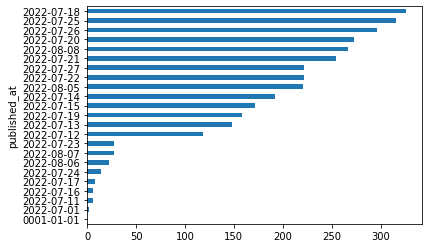

In [49]:
dates.plot(kind = 'barh')

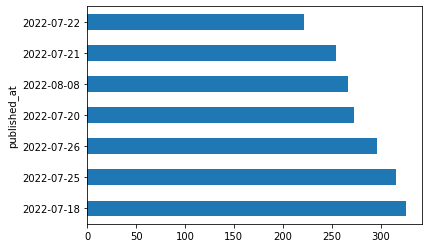

In [50]:
dates.nlargest(7).plot(kind = 'barh')

Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [51]:
c = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
vac_df['weekday'] = 9
for i in tqdm(range(len(vac_df))):
  b = datetime.datetime.weekday(vac_df.published_at[i])
  vac_df['weekday'][i] = c[b]


  0%|          | 0/3302 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [52]:
weekday = vac_df.groupby('weekday')['id'].count().sort_values()

In [53]:
weekday.sort_values(ascending = False)

weekday
Monday       915
Wednesday    643
Friday       617
Tuesday      573
Thursday     446
Saturday      56
Sunday        50
Name: id, dtype: int64

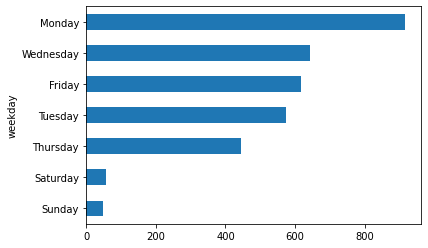

In [54]:
weekday.plot(kind = 'barh')

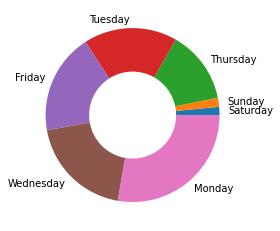

In [55]:
labels1 = ["Saturday", "Sunday", "Thursday", "Tuesday", "Friday", 'Wednesday', 'Monday']
width = 0.5
wedge_properties = {"width":width}
plt.pie(weekday, labels = labels1, wedgeprops=wedge_properties)
plt.show()

Найдите те вакансии с использованием python, которые вам интересны

In [82]:
point1 = 'аналитик'
point2 = 'analyst'
point3 = 'python'
#point4 = 'От 1 года до 3 лет'
#point5 = 'noExperience'

In [92]:
like1 = vac_df.name.str.lower().str.contains('аналитик')
like2 = vac_df.name.str.lower().str.contains('analyst')
like3 = vac_df.description.str.lower().str.contains('python')
#like4 = vac_df['experience.name'].str.lower().str.contains(point4).fillna(False)
#like5 = vac_df['experience.id'].str.lower().str.contains(point5).fillna(False)

In [98]:
analysts = vac_df[like3& (like1|like2)].reset_index().sort_values(by='published_at', ascending=False)
analysts.shape

(57, 26)

In [177]:
analysts.head()

,index,id,premium,name,description,key_skills,specializations,professional_roles,published_at,initial_created_at,...,employment.id,employment.name,department.id,department.name,employer.id,errors,request_id,test.required,skills,weekday
56,3256,67731299,False,Data engineer/Аналитик DWH,<p>Наш продукт – платформа для решения полного...,"[{'name': 'DWH'}, {'name': 'Hadoop'}, {'name':...","[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",2022-08-08,2022-07-13T11:06:44+0300,...,full,Полная занятость,3529-3529-data,Сбер. Data Science,3529,NaN,NaN,NaN,0,Monday
53,3045,68557320,False,Intelligence Analyst (Специалист по киберразве...,<p>We conduct threat intelligence research and...,[],"[{'id': '8.77', 'name': 'Имущественная безопас...","[{'id': '120', 'name': 'Специалист службы безо...",2022-08-08,2022-08-08T11:18:24+0300,...,full,Полная занятость,3529-3529-prof,Сбер для экспертов,3529,NaN,NaN,NaN,0,Monday
51,3014,68548682,False,Аналитик (Розничные риски),<p>Наша команда занимается управлением риском ...,[],"[{'id': '17.751', 'name': 'Другое', 'profarea_...","[{'id': '10', 'name': 'Аналитик'}]",2022-08-08,2022-08-08T09:25:55+0300,...,full,Полная занятость,3529-3529-prof,Сбер для экспертов,3529,NaN,NaN,NaN,0,Monday
52,3032,68563423,False,Data Analyst,<p><strong><strong>Основные задачи нашей коман...,[{'name': 'Spark'}],"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",2022-08-08,2022-08-08T12:46:23+0300,...,full,Полная занятость,3529-3529-prof,Сбер для экспертов,3529,NaN,NaN,NaN,0,Monday
54,3099,66099561,False,Data аналитик (Рекламная платформа),<p>Кто мы? Продуктовая команда &quot;Индустрии...,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...","[{'id': '17.751', 'name': 'Другое', 'profarea_...","[{'id': '10', 'name': 'Аналитик'}]",2022-08-05,2022-05-26T09:46:27+0300,...,full,Полная занятость,3529-3529-it,Сбер. IT,3529,NaN,NaN,NaN,0,Friday


Определите по полю skills какие навыки больше всего востребованы для этих вакансий

In [102]:
analysts.skills = 0

In [143]:
analysts_skills = []
for i in tqdm(range(len(analysts))):
  b = [c.get('name') for c in analysts.key_skills[i]]
  analysts_skills.extend(b)


  0%|          | 0/57 [00:00<?, ?it/s]

In [110]:
from collections import Counter

In [152]:
skills_count = Counter(analysts_skills)
skills_count.most_common(10)

[('SQL', 22),
 ('Python', 20),
 ('Анализ данных', 8),
 ('Java', 4),
 ('Atlassian Jira', 4),
 ('Hive', 4),
 ('Математическая статистика', 3),
 ('Hadoop', 3),
 ('SCALA', 2),
 ('Big Data', 2)]

Постройте график наиболее востребованных навыков для аналитика данных

In [191]:
m = pd.Series(skills_count)

In [192]:
m

Python                          20
SCALA                            2
Big Data                         2
SQL                             22
Java                             4
Математическая статистика        3
Математический анализ            2
MS PowerPoint                    2
Анализ данных                    8
Аналитическое мышление           2
Ориентация на результат          2
C++                              2
Системное мышление               2
REST                             2
UML                              2
BPMN                             2
Atlassian Jira                   4
SOAP                             2
Teradata                         2
MS SQL                           2
Навыки презентации               2
Аналитика                        2
Qlik View                        2
PowerPoint                       2
BI                               2
ORACLE                           2
Sas                              2
Agile                            2
Hive                

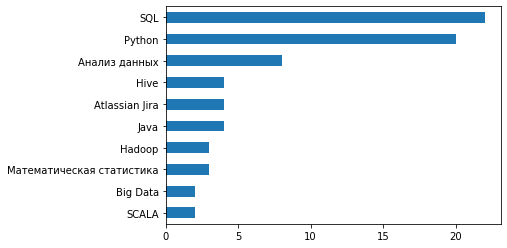

In [199]:
m.nlargest(10).sort_values(ascending = True).plot(kind = 'barh')

In [ ]:
#[x.get('name') for x in [{'name':'SQL'},{'name':'Python'},{'name':'Git'}]]